In [0]:
import pandas as pd
import numpy as np
import sys
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(14,14)})

In [0]:
interactions =  pd.read_csv(
    '/data/interactions.tsv',
    sep='\t',
    error_bad_lines=False
)

allvertebrates =  pd.read_csv(
    '/data/AllVertebrates.csv',
    sep=',',
    error_bad_lines=False
)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


b'Skipping line 567384: expected 80 fields, saw 476\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,24,25,26,27,28,29,30,41,42,43,44,45,46,47,48,49,50,55,58,59,60,61,62,63,64,65,68,69,72,73,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
interactions_backup = interactions.copy()
interactions.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,sourceTaxonGenusId,sourceTaxonFamilyName,sourceTaxonFamilyId,sourceTaxonOrderName,sourceTaxonOrderId,sourceTaxonClassName,sourceTaxonClassId,sourceTaxonPhylumName,sourceTaxonPhylumId,sourceTaxonKingdomName,sourceTaxonKingdomId,sourceId,sourceOccurrenceId,sourceCatalogNumber,sourceBasisOfRecordId,sourceBasisOfRecordName,sourceLifeStageId,sourceLifeStageName,sourceBodyPartId,sourceBodyPartName,sourcePhysiologicalStateId,sourcePhysiologicalStateName,interactionTypeName,interactionTypeId,targetTaxonId,targetTaxonIds,targetTaxonName,targetTaxonRank,targetTaxonPathNames,targetTaxonPathIds,targetTaxonPathRankNames,targetTaxonSpeciesName,targetTaxonSpeciesId,targetTaxonGenusName,targetTaxonGenusId,targetTaxonFamilyName,targetTaxonFamilyId,targetTaxonOrderName,targetTaxonOrderId,targetTaxonClassName,targetTaxonClassId,targetTaxonPhylumName,targetTaxonPhylumId,targetTaxonKingdomName,targetTaxonKingdomId,targetId,targetOccurrenceId,targetCatalogNumber,targetBasisOfRecordId,targetBasisOfRecordName,targetLifeStageId,targetLifeStageName,targetBodyPartId,targetBodyPartName,targetPhysiologicalStateId,targetPhysiologicalStateName,decimalLatitude,decimalLongitude,localityId,localityName,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
0,EOL:12001247,EOL:12001247 | WORMS:579844 | WD:Q13393587 | O...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,EOL:4824764,Muricidae,EOL:2461,Neogastropoda,EOL:2447,Gastropoda,EOL:2366,Mollusca,EOL:2195,Animalia,EOL:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,parasiteOf,http://purl.obolibrary.org/obo/RO_0002444,no:match,no:match,Fungia (Verrillofungia) repanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
1,EOL:12001247,EOL:12001247 | WORMS:579844 | WD:Q13393587 | O...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,EOL:4824764,Muricidae,EOL:2461,Neogastropoda,EOL:2447,Gastropoda,EOL:2366,Mollusca,EOL:2195,Animalia,EOL:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,parasiteOf,http://purl.obolibrary.org/obo/RO_0002444,no:match,no:match,Fungia (Verrillofungia) concinna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
2,EOL:12001243,EOL:12001243 | OTT:550603 | NCBI:494636 | OTT:...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,EOL:4824764,Muricidae,EOL:2461,Neogastropoda,EOL:2447,Gastropoda,EOL:2366,Mollusca,EOL:2195,Animalia,EOL:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,parasiteOf,http://purl.obolibrary.org/obo/RO_0002444,no:match,no:match,Fungia (Pleu

In [0]:
def get_interactions_df(typeName, df):  
    return df[df['interactionTypeName'] == typeName]

In [0]:
def get_biggests(n):  
    df_aux = interactions['interactionTypeName']
    aux = df_aux.groupby(df_aux.tolist()).size()
    print(aux)
    biggests = aux[aux>n].index
    return biggests

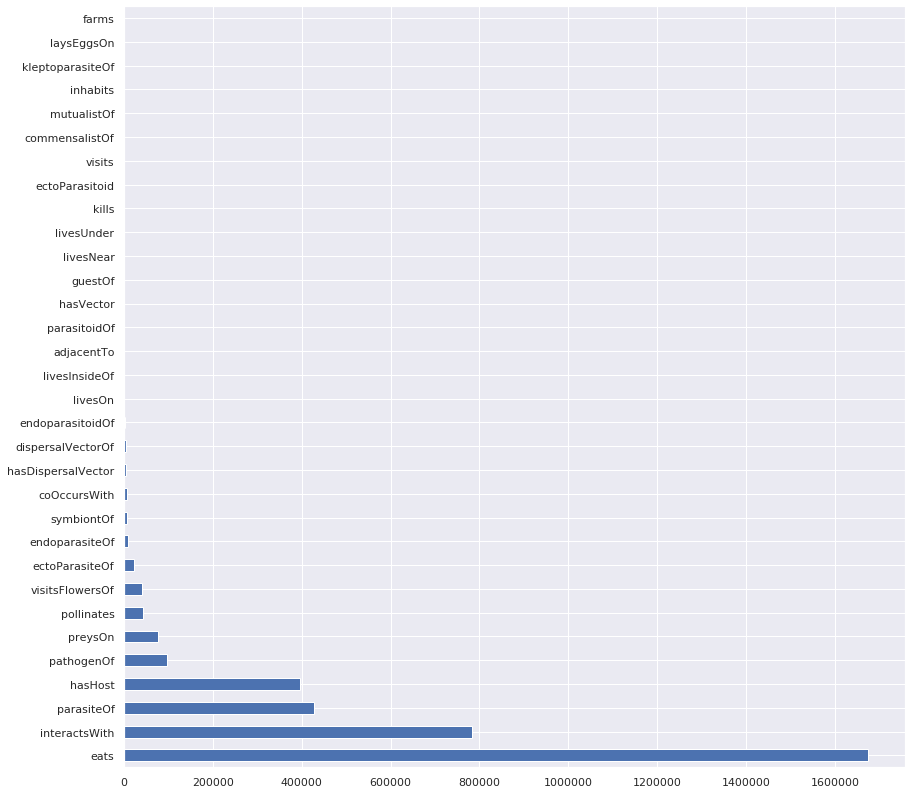

In [0]:
interactions['interactionTypeName'].value_counts().plot.barh()

plt.show()

In [0]:
interactions.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,sourceTaxonGenusId,sourceTaxonFamilyName,sourceTaxonFamilyId,sourceTaxonOrderName,sourceTaxonOrderId,sourceTaxonClassName,sourceTaxonClassId,sourceTaxonPhylumName,sourceTaxonPhylumId,sourceTaxonKingdomName,sourceTaxonKingdomId,sourceId,sourceOccurrenceId,sourceCatalogNumber,sourceBasisOfRecordId,sourceBasisOfRecordName,sourceLifeStageId,sourceLifeStageName,sourceBodyPartId,sourceBodyPartName,sourcePhysiologicalStateId,sourcePhysiologicalStateName,interactionTypeName,interactionTypeId,targetTaxonId,targetTaxonIds,targetTaxonName,targetTaxonRank,targetTaxonPathNames,targetTaxonPathIds,targetTaxonPathRankNames,targetTaxonSpeciesName,targetTaxonSpeciesId,targetTaxonGenusName,targetTaxonGenusId,targetTaxonFamilyName,targetTaxonFamilyId,targetTaxonOrderName,targetTaxonOrderId,targetTaxonClassName,targetTaxonClassId,targetTaxonPhylumName,targetTaxonPhylumId,targetTaxonKingdomName,targetTaxonKingdomId,targetId,targetOccurrenceId,targetCatalogNumber,targetBasisOfRecordId,targetBasisOfRecordName,targetLifeStageId,targetLifeStageName,targetBodyPartId,targetBodyPartName,targetPhysiologicalStateId,targetPhysiologicalStateName,decimalLatitude,decimalLongitude,localityId,localityName,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
0,EOL:12001247,EOL:12001247 | WORMS:579844 | WD:Q13393587 | O...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,EOL:4824764,Muricidae,EOL:2461,Neogastropoda,EOL:2447,Gastropoda,EOL:2366,Mollusca,EOL:2195,Animalia,EOL:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,parasiteOf,http://purl.obolibrary.org/obo/RO_0002444,no:match,no:match,Fungia (Verrillofungia) repanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
1,EOL:12001247,EOL:12001247 | WORMS:579844 | WD:Q13393587 | O...,Leptoconchus massini,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus massini,EOL:12001247,Leptoconchus,EOL:4824764,Muricidae,EOL:2461,Neogastropoda,EOL:2447,Gastropoda,EOL:2366,Mollusca,EOL:2195,Animalia,EOL:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,parasiteOf,http://purl.obolibrary.org/obo/RO_0002444,no:match,no:match,Fungia (Verrillofungia) concinna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://en.wiktionary.org/wiki/support,"Gittenberger, A., Gittenberger, E. (2011). Cry...",10.1007/s13127-011-0039-1,NaN,Jorrit H. Poelen. 2014. Species associations m...,FloraVincent/template-dataset,https://github.com/FloraVincent/template-datas...,NaN,2019-03-30T23:08:44.205Z
2,EOL:12001243,EOL:12001243 | OTT:550603 | NCBI:494636 | OTT:...,Leptoconchus inpleuractis,species,Animalia | Mollusca | Gastropoda | Neogastropo...,EOL:1 | EOL:2195 | EOL:2366 | EOL:2447 | EOL:4...,kingdom | phylum | class | order | superfamily...,Leptoconchus inpleuractis,EOL:12001243,Leptoconchus,EOL:4824764,Muricidae,EOL:2461,Neogastropoda,EOL:2447,Gastropoda,EOL:2366,Mollusca,EOL:2195,Animalia,EOL:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,parasiteOf,http://purl.obolibrary.org/obo/RO_0002444,no:match,no:match,Fungia (Pleu

In [0]:
df_eats = get_interactions_df('eats', interactions)
df_eats.head()

,sourceTaxonId,sourceTaxonIds,sourceTaxonName,sourceTaxonRank,sourceTaxonPathNames,sourceTaxonPathIds,sourceTaxonPathRankNames,sourceTaxonSpeciesName,sourceTaxonSpeciesId,sourceTaxonGenusName,sourceTaxonGenusId,sourceTaxonFamilyName,sourceTaxonFamilyId,sourceTaxonOrderName,sourceTaxonOrderId,sourceTaxonClassName,sourceTaxonClassId,sourceTaxonPhylumName,sourceTaxonPhylumId,sourceTaxonKingdomName,sourceTaxonKingdomId,sourceId,sourceOccurrenceId,sourceCatalogNumber,sourceBasisOfRecordId,sourceBasisOfRecordName,sourceLifeStageId,sourceLifeStageName,sourceBodyPartId,sourceBodyPartName,sourcePhysiologicalStateId,sourcePhysiologicalStateName,interactionTypeName,interactionTypeId,targetTaxonId,targetTaxonIds,targetTaxonName,targetTaxonRank,targetTaxonPathNames,targetTaxonPathIds,targetTaxonPathRankNames,targetTaxonSpeciesName,targetTaxonSpeciesId,targetTaxonGenusName,targetTaxonGenusId,targetTaxonFamilyName,targetTaxonFamilyId,targetTaxonOrderName,targetTaxonOrderId,targetTaxonClassName,targetTaxonClassId,targetTaxonPhylumName,targetTaxonPhylumId,targetTaxonKingdomName,targetTaxonKingdomId,targetId,targetOccurrenceId,targetCatalogNumber,targetBasisOfRecordId,targetBasisOfRecordName,targetLifeStageId,targetLifeStageName,targetBodyPartId,targetBodyPartName,targetPhysiologicalStateId,targetPhysiologicalStateName,decimalLatitude,decimalLongitude,localityId,localityName,eventDateUnixEpoch,argumentTypeId,referenceCitation,referenceDoi,referenceUrl,sourceCitation,sourceNamespace,sourceArchiveURI,sourceDOI,sourceLastSeenAtUnixEpoch
2456,GBIF:4284440,GBIF:4284440 | OTT:1006852 | WD:Q7492475 | WOR...,Cyprinodon variegatus,species,Animalia | Chordata | Actinopterygii | Cyprino...,GBIF:1 | GBIF:44 | GBIF:204 | GBIF:547 | GBIF:...,kingdom | phylum | class | order | family | ge...,Cyprinodon variegatus,GBIF:4284440,Cyprinodon,GBIF:2346622,Cyprinodontidae,GBIF:7656,Cyprinodontiformes,GBIF:547,Actinopterygii,GBIF:204,Chordata,GBIF:44,Animalia,GBIF:1,ACT_44SCvar.1,NaN,NaN,no:match,Literature,no:match,NaN,no:match,NaN,no:match,NaN,eats,http://purl.obolibrary.org/obo/RO_0002470,EOL_V2:281,EOL_V2:281 | OTT:361838 | GBIF:6 | IF:10000518...,Plantae,kingdom,Plantae,EOL_V2:281,kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plantae,EOL_V2:281,NaN,NaN,NaN,no:match,Literature,no:match,NaN,no:match,NaN,no:match,NaN,NaN,NaN,NaN,Flooded pits on Galveston Island,NaN,https://en.wiktionary.org/wiki/support,"Don Simpson. 1956. Notes on Habitats, Systemat...",NaN,NaN,http://gomexsi.tamucc.edu,GoMexSI/JLewis_GoMexSi,https://github.com/GoMexSI/JLewis_GoMexSi/arch...,NaN,2019-09-20T23:05:01.090Z
2457,GBIF:4284440,GBIF:4284440 | OTT:1006852 | WD:Q7492475 | WOR...,Cyprinodon variegatus,species,Animalia | Chordata | Actinopterygii | Cyprino...,GBIF:1 | GBIF:44 | GBIF:204 | GBIF:547 | GBIF:...,kingdom | phylum | class | order | family | ge...,Cyprinodon variegatus,GBIF:4284440,Cyprinodon,GBIF:2346622,Cyprinodontidae,GBIF:7656,Cyprinodontiformes,GBIF:547,Actinopterygii,GBIF:204,Chordata,GBIF:44,Animalia,GBIF:1,ACT_44SCvar.1,NaN,NaN,no:match,Literature,no:match,NaN,no:match,NaN,no:match,NaN,eats,http://purl.obolibrary.org/obo/RO_0002470,EOL_V2:281,EOL_V2:281 | OTT:361838 | GBIF:6 | IF:10000518...,Plantae,kingdom,Plantae,EOL_V2:281,kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plantae,EOL_V2:281,NaN,NaN,NaN,no:match,Literature,no:match,NaN,no:match,NaN,no:match,NaN,NaN,NaN,NaN,Tidal ponds at Magnolia Beach and Indianola,NaN,https://en.wiktionary.org/wiki/support,"Don Simpson. 1956. Notes on Habitats, Systemat...",NaN,NaN,http://gomexsi.tamucc.edu,GoMexSI/JLewis_GoMexSi,https://github.com/GoMexSI/JLewis_GoMexSi/arch...,NaN,2019-09-20T23:05:01.090Z
2458,GBIF:4284440,GBIF:4284440 | OTT:1006852 | WD:Q7492475 | WOR...,Cyprinodon variegatus,species,Animalia | Chordata | Actinopterygii | Cyprino...,GBIF:1 | GBIF:44 | GBIF:204 | GBIF:547 | GBIF:...,kingdom | phylum | class | order | family | ge...,Cyprinodon variegatus,GBIF:4284440,Cyprinodon,GBIF:2346622,Cyprinodonti

In [0]:
source_id = df_eats['sourceTaxonSpeciesId']
target_id = df_eats['targetTaxonSpeciesId']

source_name = df_eats['sourceTaxonSpeciesName']
target_name = df_eats['targetTaxonSpeciesName']

local_id = df_eats['localityId']
local_name = df_eats['localityName']

df = pd.DataFrame({'source':source_name, 'target':target_name})

df = df.dropna(axis=0)
df = df.drop_duplicates()
df.to_csv('eats.csv', index=0)


Kladothrips acaciae          1
Orthenches chlorocoma        1
Phaeohelotium purpureum      1
Chionodes optio              1
Anthonomus conspersus        1
Dieuches notatus             1
Candovia evoneobertii        1
Protoventuria major          1
Castiarina moribunda         1
Eriophyes laevis             1
Celaenorrhinus maculosa      1
Hemiceras nigrescens         1
Chrysomela invicta           1
Elodina walkeri              1
Philodoria pipturiella       1
Ophiobolus                   1
Glyptotendipes seminole      1
Pezizellaster serratus       1
Xyleborus cryptographus      1
Akainothrips notius          1
Philemon corniculatus        1
Nola praefica                1
Chloromachia infracta        1
Podospora setosa             1
Septofusidium elegantulum    1
Ageletha elaeodes            1
Uroleucon rudbeckiae         1
Gonioctena americana         1
Pierella rhea                1
Dasineura crataegi           1
Scomberomorus guttatus       1
Darisodes orygaria           1
Castiari

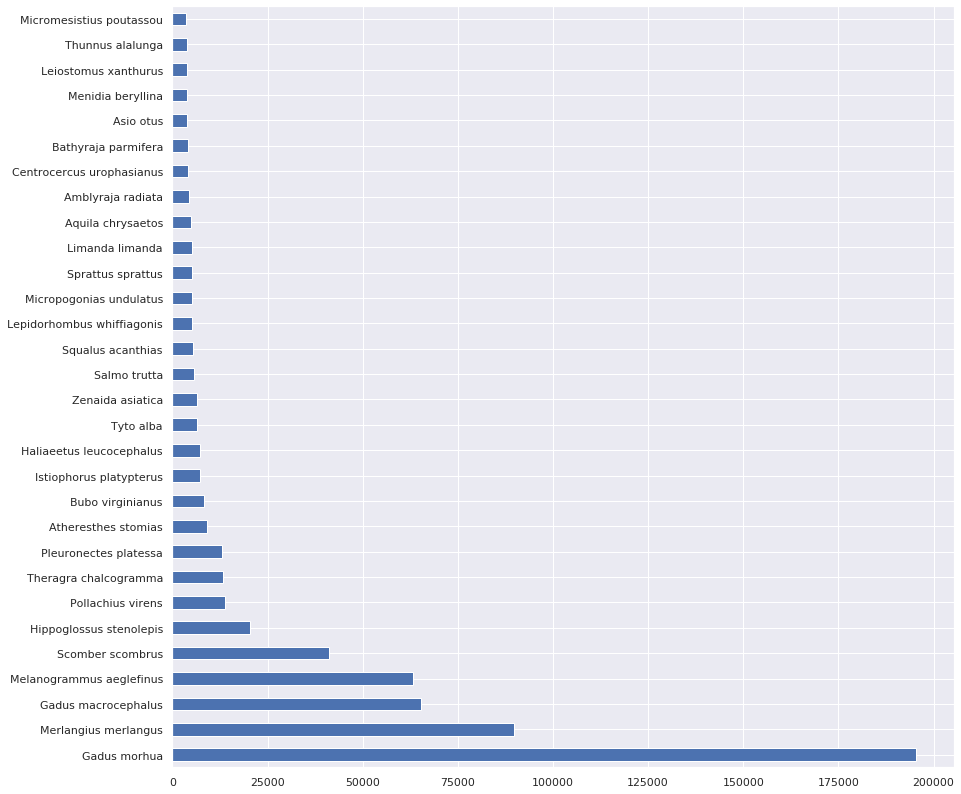

In [0]:
#Troque target_name por target_id para ver os ids no grafico em vez dos nomes

qtd_source_id = pd.Series(source_name).value_counts()

qtd_source_id_top30 = qtd_source_id[:30]

qtd_source_id_top30.plot.barh()

qtd_source_id_min30 = qtd_source_id.sort_values()
qtd_source_id_min30 = qtd_source_id_min30[:60]
qtd_source_id_min30

In [0]:
#Troque target_name por target_id para ver os ids no grafico em vez dos nomes

qtd_target_id = pd.Series(target_name).value_counts()

qtd_target_id_top30 = qtd_target_id[:30]

a = qtd_target_id.argsort()
a

#qtd_target_id_top30.plot.barh()

Chionoecetes bairdi          21340
Chionoecetes opilio          16924
Theragra chalcogramma        16925
Pseudocalanus elongatus      16926
Thysanoessa inermis          16927
                             ...  
Leptoglossus clypealis           4
Lepisosteus osseus               3
Diplotaxodon argenteus           2
Clethrionomys rutilus            1
Eleutheranthera ruderalis        0
Name: targetTaxonSpeciesName, Length: 21341, dtype: int64

In [0]:
'''
df_predador = df.set_index('source_id')
df_presa = df.set_index('target_id')

df.head()
'''

"\ndf_predador = df.set_index('source_id')\ndf_presa = df.set_index('target_id')\n\ndf.head()\n"